<a href="https://colab.research.google.com/github/abhishek09827/RJPOLICE_HACK_680_Sangyan_07/blob/main/UPI_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [8]:
dataset = pd.read_csv('/content/upi_fraud_dataset.csv')

In [9]:
dataset.head()

,trans_hour,trans_day,trans_month,trans_year,category,upi_number,age,trans_amount,state,zip,fraud_risk
0,22,16,9,2021,Retail,87,27,199.31,Missouri,84946,1
1,12,13,7,2016,Food,71990978,42,448.06,Minnesota,68524,1
2,13,10,8,2019,Food,5601,70,127.79,Louisiana,34800,1
3,10,7,10,2023,Entertainment,671623009,61,967.70,Tennessee,7311,0
4,17,10,1,2022,Retail,666,40,911.30,Texas,60970,1


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   trans_hour    1000 non-null   int64  
 1   trans_day     1000 non-null   int64  
 2   trans_month   1000 non-null   int64  
 3   trans_year    1000 non-null   int64  
 4   category      1000 non-null   object 
 5   upi_number    1000 non-null   int64  
 6   age           1000 non-null   int64  
 7   trans_amount  1000 non-null   float64
 8   state         1000 non-null   object 
 9   zip           1000 non-null   int64  
 10  fraud_risk    1000 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 86.1+ KB


In [11]:
dataset= dataset.drop(columns=['category','state'])

In [12]:
dataset.head()

,trans_hour,trans_day,trans_month,trans_year,upi_number,age,trans_amount,zip,fraud_risk
0,22,16,9,2021,87,27,199.31,84946,1
1,12,13,7,2016,71990978,42,448.06,68524,1
2,13,10,8,2019,5601,70,127.79,34800,1
3,10,7,10,2023,671623009,61,967.70,7311,0
4,17,10,1,2022,666,40,911.30,60970,1


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   trans_hour    1000 non-null   int64  
 1   trans_day     1000 non-null   int64  
 2   trans_month   1000 non-null   int64  
 3   trans_year    1000 non-null   int64  
 4   upi_number    1000 non-null   int64  
 5   age           1000 non-null   int64  
 6   trans_amount  1000 non-null   float64
 7   zip           1000 non-null   int64  
 8   fraud_risk    1000 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 70.4 KB


In [14]:
# Create x with selected columns
x = dataset[['trans_hour','trans_day', 'trans_month', 'trans_year', 'upi_number', 'age', 'trans_amount', 'zip']]

# Create y with the 'fraud_risk' column
y = dataset['fraud_risk']


In [15]:
x.describe()

,trans_hour,trans_day,trans_month,trans_year,upi_number,age,trans_amount,zip
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,11.538000,16.118000,6.507000,2019.062000,7.338610e+07,44.316000,503.540140,50551.720000
std,6.930844,9.121912,3.506886,2.592465,1.975371e+08,15.106699,279.008209,28718.485981
min,0.000000,1.000000,1.000000,2015.000000,0.000000e+00,18.000000,12.920000,501.000000
25%,5.000000,8.000000,3.000000,2017.000000,4.040500e+03,31.000000,265.355000,26089.250000
50%,12.000000,16.000000,7.000000,2019.000000,2.207120e+05,45.000000,502.050000,51335.500000
75%,18.000000,24.000000,10.000000,2021.000000,1.291040e+07,57.000000,743.237500,75784.250000
max,23.000000,31.000000,12.000000,2023.000000,9.983405e+08,70.000000,997.250000,99902.000000


In [16]:
y.describe()

count    1000.000000
mean        0.496000
std         0.500234
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: fraud_risk, dtype: float64

In [17]:
dataset.head()

,trans_hour,trans_day,trans_month,trans_year,upi_number,age,trans_amount,zip,fraud_risk
0,22,16,9,2021,87,27,199.31,84946,1
1,12,13,7,2016,71990978,42,448.06,68524,1
2,13,10,8,2019,5601,70,127.79,34800,1
3,10,7,10,2023,671623009,61,967.70,7311,0
4,17,10,1,2022,666,40,911.30,60970,1


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [20]:
x_train.shape

(700, 8)

In [21]:
y_train.shape

(700,)

In [22]:
x_test.shape

(300, 8)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [24]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [25]:
x_train[ : 5]

array([[ 0.18870764,  1.61228606,  0.69893739, -0.41338847, -0.26306506,
        -0.41913627, -0.78002777, -1.11486634],
       [-1.38215593,  0.96154596, -1.30035811, -0.80443162, -0.36619332,
        -1.14963633, -1.05633732, -1.00006552],
       [ 1.33115386,  0.41926255,  1.55577831, -0.41338847,  0.07702423,
        -1.48168181, -0.07576319, -0.60199614],
       [ 0.61712497, -0.66530428,  0.98455103,  1.54182726, -0.35458733,
         0.37777289,  0.32353302,  1.40785359],
       [-1.66776748,  1.28691601,  0.98455103,  1.54182726, -0.36641311,
         0.90904566,  1.57881067, -1.49080749]])

In [26]:
x_test[:5]

array([[-0.2397097 , -0.01456418, -1.58597176,  0.36869782, -0.32231276,
        -0.55195446,  0.85288245, -0.07671504],
       [ 0.33151341,  0.85308928,  0.69893739, -0.02234532,  4.51767607,
         0.51059108,  1.20795914,  1.28425603],
       [ 0.90273653,  1.07000265,  0.41332374,  0.75974097,  0.74665226,
         0.77622747, -0.6906251 ,  0.23205723],
       [ 0.47431919, -0.12302087,  0.69893739,  1.15078412,  1.83869638,
         0.97545476,  0.44419985, -1.01213546],
       [ 1.04554231,  0.41926255, -1.30035811, -1.58651791, -0.36636724,
        -0.81759085,  0.7111944 ,  0.49595933]])

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [28]:
LR_model = LogisticRegression(random_state=0)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],  # Solver for optimization
    'max_iter': [100, 200, 300, 400, 500]  # Maximum number of iterations
}
grid_search = GridSearchCV(estimator=LR_model, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)


best_LR_model = LogisticRegression(random_state=0, **best_params)
best_LR_model.fit(x_train, y_train)


Best hyperparameters: {'C': 0.001, 'max_iter': 100, 'solver': 'lbfgs'}


LogisticRegression(C=0.001, random_state=0)

In [29]:

best_LR_model = LogisticRegression(C=0.001, max_iter=100, solver='lbfgs', random_state=0)


best_LR_model.fit(x_train, y_train)


LogisticRegression(C=0.001, random_state=0)

In [30]:
best_LR_model.fit(x_train, y_train)


LogisticRegression(C=0.001, random_state=0)

In [31]:

y_pred = best_LR_model.predict(x_test)


In [32]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0])

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.48


In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Precision: 0.485
Recall: 0.48
F1-score: 0.4698701298701298
Confusion Matrix:
[[ 54 102]
 [ 54  90]]


In [35]:
acc_lr = accuracy_score(y_test,y_pred)
print(acc_lr)

0.48


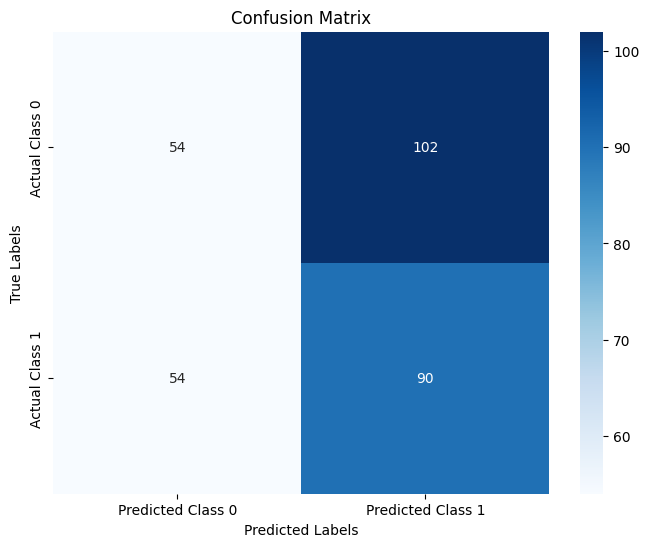

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Predicted Class 0', 'Predicted Class 1'],
            yticklabels=['Actual Class 0', 'Actual Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [50]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   trans_hour    1000 non-null   int64  
 1   trans_day     1000 non-null   int64  
 2   trans_month   1000 non-null   int64  
 3   trans_year    1000 non-null   int64  
 4   upi_number    1000 non-null   int64  
 5   age           1000 non-null   int64  
 6   trans_amount  1000 non-null   float64
 7   zip           1000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 62.6 KB


In [85]:
import pandas as pd

data_point = {
    'trans_hour': 5,
    'trans_day': 3,
    'trans_month': 12,
    'trans_year': 2023,
    'upi_number': 23456754,
    'age': 0,
    'trans_amount': 500.0,
    'zip': 4532
}

data_df = pd.DataFrame([data_point])

any_zero = data_df.iloc[0, :-1].eq(0).any()

if any_zero:
    data_df['prediction_label'] = 'The Transaction you made is Invalid, Enter Valid Data'
else:
    prediction = best_LR_model.predict(data_df)
    data_df['prediction'] = prediction
    data_df['prediction_label'] = data_df['prediction'].map({1: 'Yes, it is fraud', 0: 'No, it is not fraud'})

# Printing only the 'prediction_label' column
print(data_df['prediction_label'])


0    The Transaction you made is Invalid, Enter Val...
Name: prediction_label, dtype: object


In [87]:
import pandas as pd

data_point = {
    'trans_hour': 15,
    'trans_day': 23,
    'trans_month': 11,
    'trans_year': 2022,
    'upi_number': 5345354,
    'age': 30,
    'trans_amount': 500.0,
    'zip': 43443
}

data_df = pd.DataFrame([data_point])

any_zero = data_df.iloc[0, :-1].eq(0).any()

if any_zero:
    data_df['prediction_label'] = 'The Transaction you made is Invalid, Enter Valid Data'
else:
    prediction = best_LR_model.predict(data_df)
    data_df['prediction'] = prediction
    data_df['prediction_label'] = data_df['prediction'].map({1: 'Yes, it is fraud', 0: 'No, it is not fraud'})

# Printing only the 'prediction_label' column
print(data_df['prediction_label'])


0    No, it is not fraud
Name: prediction_label, dtype: object


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
